<a href="https://colab.research.google.com/github/caplove/DX_team_4_repo/blob/main/LG_Rawdata_based.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LG자체 결과 - 1D-CNN, GRU

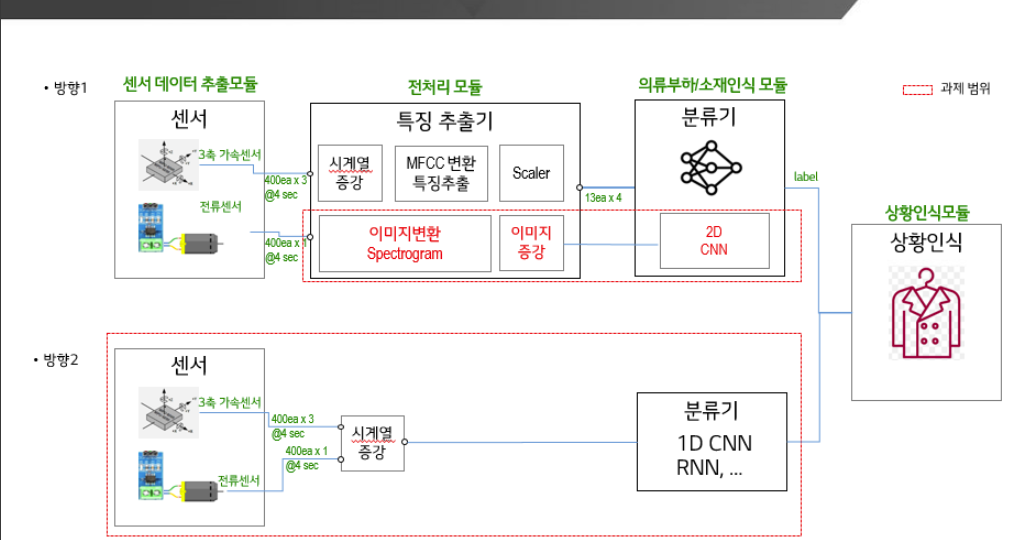

# **데이터 가져오기**

---



In [ ]:
collab_en=0  # google collab 이면 1, local 이면 0

In [ ]:
if collab_en:
  !git clone https://github.com/caplove/DX_team_4_repo.git

Cloning into 'DX_team_4_repo'...
remote: Enumerating objects: 647, done.
remote: Counting objects: 100% (647/647), done.
remote: Compressing objects: 100% (610/610), done.
remote: Total 647 (delta 351), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (647/647), 173.40 MiB | 8.98 MiB/s, done.
Resolving deltas: 100% (351/351), done.
Checking out files: 100% (83/83), done.


In [ ]:
import sys

if collab_en:
  sys.path.append('/content/DX_team_4_repo')  # google collab
else:
  sys.path.append('./')                     # local


# 모듈과 함수 불러오기


In [ ]:
"""모듈 / 함수 불러오기 """
from augment_import2 import augment2
from extractor_import import extractor
# from models_import import my_models
# from models_import2 import my_models
# from models_import4 import my_models_2
from models_import4 import my_models_1D_CNN, my_models_GRU, my_models_Incept

from data_import2 import import_data_from_folder
import pandas as pd

## 데이터 구조

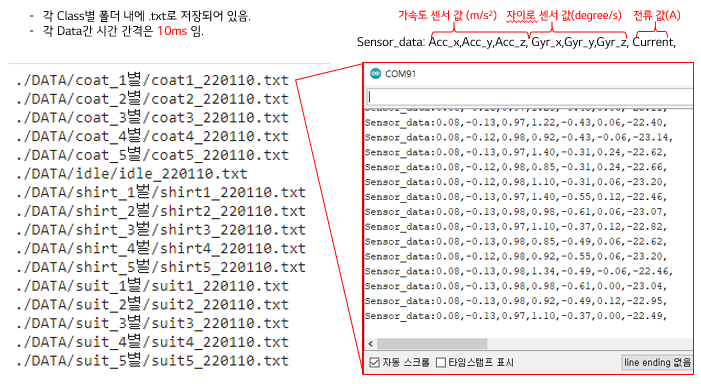

In [ ]:
"""데이터 import
# 훈련 / 검증 데이터 : Data  --> x,y
# 테스트 데이터 : Data_test  --> test_x, test_y
"""
if collab_en:
  FOLDER_NAME = "/DX_team_4_repo/Data"    # collab
else:
  FOLDER_NAME = "./Data_0304"
x,y = import_data_from_folder(FOLDER_NAME,400*5)   # 22.03.21 추가 데이터 개수
print(x.shape,y.shape)

if collab_en:
  TEST_FOLDER_NAME = "/DX_team_4_repo/Data_test"  # collab
else:
  TEST_FOLDER_NAME = "./Data_0330"
ext_x,ext_y = import_data_from_folder(TEST_FOLDER_NAME,400*2)
print(ext_x.shape,ext_y.shape)

""" 비어있는 데이터프레임 만들기"""
features_all = pd.DataFrame()
# jittering / MagWarp / Scaling / Combination
x_in_jittering = pd.DataFrame()
x_in_MagWarp = pd.DataFrame()
x_in_Scaling = pd.DataFrame()
x_in_Combination = pd.DataFrame()

.//DX_team_4_repo/Data//suit_4.txt
.//DX_team_4_repo/Data//suit_3.txt
.//DX_team_4_repo/Data//shirt_3.txt
.//DX_team_4_repo/Data//suit_2.txt
.//DX_team_4_repo/Data//suit_1.txt
.//DX_team_4_repo/Data//coat_1.txt
.//DX_team_4_repo/Data//shirt_1.txt
.//DX_team_4_repo/Data//shirt_4.txt
.//DX_team_4_repo/Data//shirt_5.txt
.//DX_team_4_repo/Data//suit_5.txt
.//DX_team_4_repo/Data//coat_3.txt
.//DX_team_4_repo/Data//shirt_2.txt
.//DX_team_4_repo/Data//coat_5.txt
.//DX_team_4_repo/Data//coat_2.txt
.//DX_team_4_repo/Data//coat_4.txt
.//DX_team_4_repo/Data//idle.txt
(32000, 7) (32000,)
.//DX_team_4_repo/Data_test/suit_4/suit_4.txt
.//DX_team_4_repo/Data_test/coat_3/coat_3.txt
.//DX_team_4_repo/Data_test/shirt_1/shirt_1.txt
.//DX_team_4_repo/Data_test/coat_5/coat_5.txt
.//DX_team_4_repo/Data_test/coat_4/coat_4.txt
.//DX_team_4_repo/Data_test/coat_2/coat_2.txt
.//DX_team_4_repo/Data_test/suit_1/suit_1.txt
.//DX_team_4_repo/Data_test/shirt_4/shirt_4.txt
.//DX_team_4_repo/Data_test/suit_5/suit_5.txt

# Augment / 모델별 Accuracy


In [ ]:
"""Augmentation param 설정"""

jitter_para_list = [0.01,0.1]  # sigma
MW_para_list =     [0.01,0.1]  # sigma
Scale_para_list =  [0.01,0.1]

# 파라미터 설정



>> - external_test_data_use flag :
 * 0 : train과 test가 동일 set 에서 split 하여사용
 * 1 : 별도의 폴더(Data_test)에서 불러와서 사용 

>> - log_en : 0 (off), 1(on)


In [ ]:
"""flag 설정"""
# 별도의 test data(Data_test폴더) 사용여부 결정  
external_test_data_use = 1  # 0 : Data 폴더에서 6:2:2로 split사용,   1:Data_test폴더의 데이터 사용 

# 그래프/결과값 보이기
log_en = 0   # 0 : 결과만 보임,  1 : 중간 과정 보임.

In [ ]:

# 빈 Accuracy.xls 만들기
# df = pd.DataFrame(columns=['jit','MW','Scale','DNN','MLP','DTree','KNN','AdaBoost','RandomForest'])
df = pd.DataFrame(columns=['jit','MW','Scale','CNN','GRU','Inception'])


# i,j,k는 각각 jitter, MagWarp, Scale의 sigma 값


for i in jitter_para_list:
    for j in MW_para_list:
        for k in Scale_para_list:
            
            print(f"데이터 증강 파라미터: jitter_sigma:{i},   MW_sigma:{j},   Scale_sigma:{k}")
            # augmentation 방법별로 원본 x와 동일 size의 데이터 생성
            x_in_jittering, x_in_MagWarp, x_in_Scaling, x_in_Combination = augment2(x,y,i,j,k,log_en)
            #print(x.shape, x_in_jittering.shape, x_in_MagWarp.shape, x_in_Scaling.shape, x_in_Combination.shape, y.shape)
            print("status: 데이터 증강 완료")

            # 증강 데이터 선정
            # dataset_list = [x]                                                               # default 데이터
            dataset_list = [x,x_in_jittering, x_in_MagWarp, x_in_Scaling, x_in_Combination]     # 증강    데이터
            # dataset_list = [x,x_in_jittering]     # 증강 데이터

            
            """Raw 데이터 기반 모든 모델에 대한 훈련 및 평가"""
            # CNN_MAX,Acc_1D_CNN_valid, Acc_1D_CNN, Acc_GRU_valid, Acc_GRU, Acc_Incpt_valid, Acc_Incpt = my_models_2(x,y,dataset_list,0,0,ext_x,ext_y)
            # print("내부 데이터사용결과::", CNN_MAX, Acc_1D_CNN_valid, Acc_1D_CNN, Acc_GRU_valid, Acc_GRU, Acc_Incpt_valid, Acc_Incpt)

            
            # Acc_1D_CNN_valid, Acc_1D_CNN_test, Acc_1D_CNN_ext, Acc_GRU_valid, Acc_GRU_test, Acc_GRU_ext = my_models_2(x,y,dataset_list,log_en,external_test_data_use,ext_x,ext_y)
            # print("Accuracy(훈련,내부,외부)::", Acc_1D_CNN_valid, Acc_1D_CNN_test, Acc_1D_CNN_ext, Acc_GRU_valid, Acc_GRU_test, Acc_GRU_ext)
            
            
            
            
            Acc_1D_CNN_training,Acc_1D_CNN_valid, Acc_1D_CNN_test = my_models_1D_CNN(x,y,dataset_list,log_en,external_test_data_use,ext_x,ext_y)
            print(f"1D_CNN: {Acc_1D_CNN_training:.3f},{Acc_1D_CNN_valid:.3f},{Acc_1D_CNN_test:.3f}")

            Acc_GRU_training,Acc_GRU_valid, Acc_GRU_test = my_models_GRU(x,y,dataset_list,log_en,external_test_data_use,ext_x,ext_y)
            print(f"GRU: {Acc_GRU_training:.3f},{Acc_GRU_valid:.3f},{Acc_GRU_training:.3f}")
            
            Acc_Incept_training,Acc_Incept_valid, Acc_Incept_test = my_models_Incept(x,y,dataset_list,log_en,external_test_data_use,ext_x,ext_y)
            print(f"Incept: {Acc_Incept_training:.3f},{Acc_Incept_valid:.3f},{Acc_Incept_training:.3f}")



데이터 증강 파라미터: jitter_sigma:0.01,   MW_sigma:0.01,   Scale_sigma:0.01
status: 데이터 증강 완료
(96000, 7) (96000, 1) (32000, 7) (32000, 1) (32000, 7) (32000, 1)
STATUS : GRU 완료


TypeError: ignored

# 분석

> - Training / Test set 이 동일 모집단에서 split 하여, 훈련 / 검증한 경우

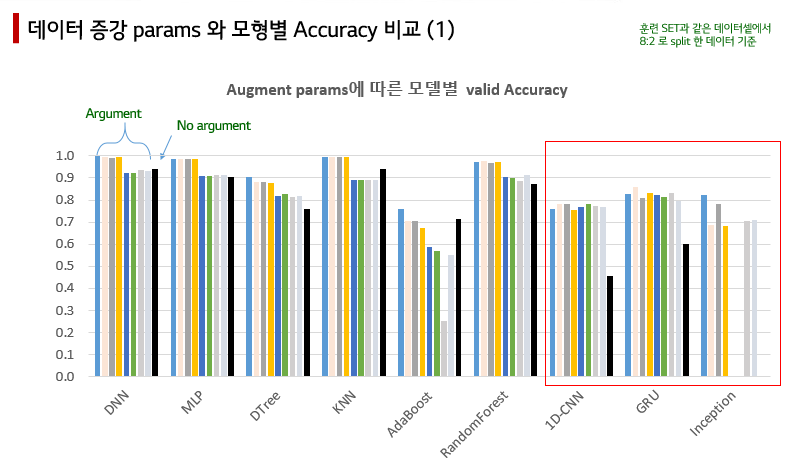

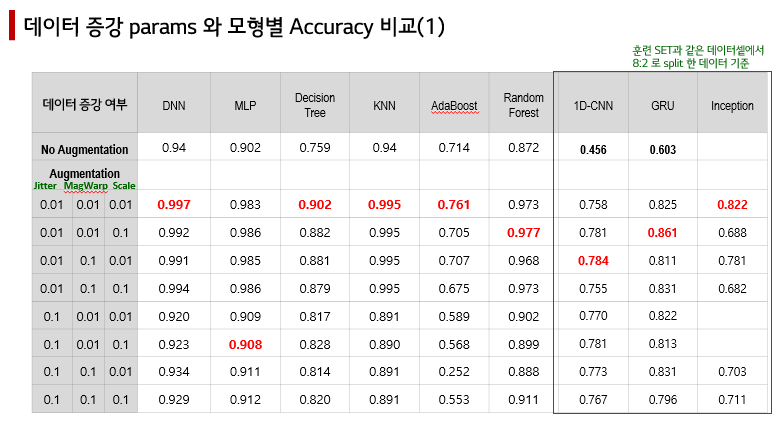

> - Test set을 다른 싯점에 구해서 검증한 경우




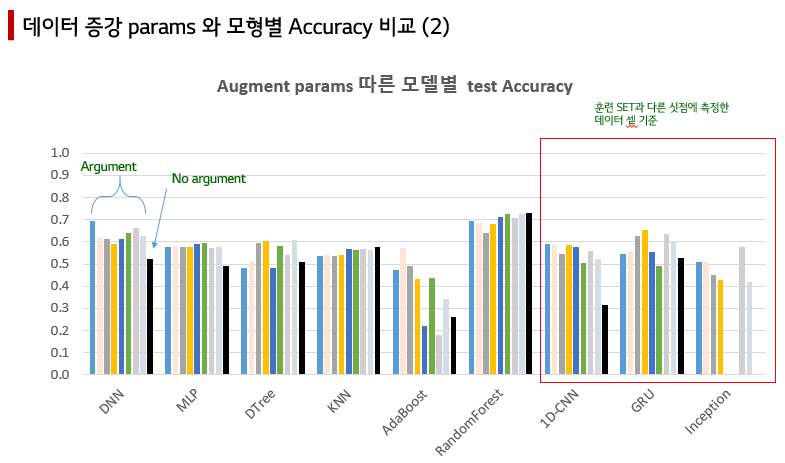

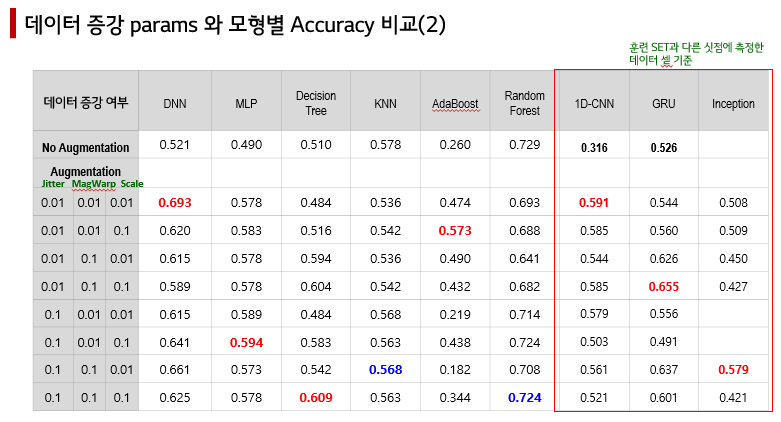